# 시계열 데이터를 다뤄보자

## Numpy의 polyfit으로 회귀(regression) 분석하기

In [1]:
!pip install pandas_datareader

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from datetime import datetime

In [4]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=5ff043ea4a3db7ca1fdbd0e9ee400a541ba9f2d17d37b21acc4b80e75c524ac3
  Stored in directory: C:\Users\Administrator\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [5]:
traffic_web = pd.read_csv('./data/아카이브7-8/08. Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
traffic_web = traffic_web[traffic_web['hit'].notnull()]
traffic_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


<AxesSubplot:xlabel='data'>

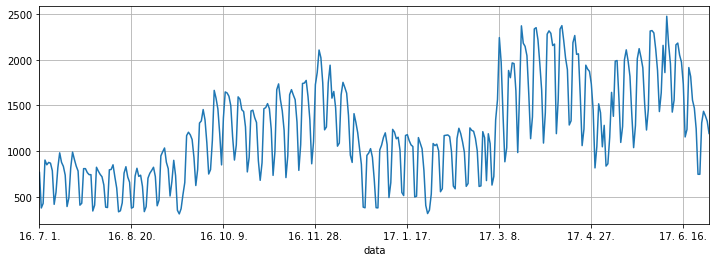

In [8]:
traffic_web['hit'].plot(figsize=(12,4), grid=True)

In [10]:
df = pd.DataFrame(
    {'ds': traffic_web.index , 'y':traffic_web['hit']}
)

In [11]:
df

,ds,y
data,,
16. 7. 1.,16. 7. 1.,766.0
16. 7. 2.,16. 7. 2.,377.0
16. 7. 3.,16. 7. 3.,427.0
16. 7. 4.,16. 7. 4.,902.0
16. 7. 5.,16. 7. 5.,850.0
...,...,...
17. 6. 26.,17. 6. 26.,1309.0
17. 6. 27.,17. 6. 27.,1436.0
17. 6. 28.,17. 6. 28.,1387.0


In [16]:
df.reset_index(inplace=True)

In [19]:
df['ds'] = pd.to_datetime(df['ds'],format='%y. %m. %d.')

In [20]:
df['ds']

0     2016-07-01
1     2016-07-02
2     2016-07-03
3     2016-07-04
4     2016-07-05
         ...    
360   2017-06-26
361   2017-06-27
362   2017-06-28
363   2017-06-29
364   2017-06-30
Name: ds, Length: 365, dtype: datetime64[ns]

In [22]:
m = Prophet(yearly_seasonality=True)

In [23]:
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [24]:
future =m.make_future_dataframe(periods=60) # 60일치 예측

In [26]:
forcsat= m.predict(future)

In [28]:
forcsat[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-07-01,729.000391,526.560505,937.284179
1,2016-07-02,298.203795,84.269957,515.130060
2,2016-07-03,418.563067,218.486459,628.705818
3,2016-07-04,962.224784,758.820502,1169.597487
4,2016-07-05,992.037926,782.340147,1215.975257
...,...,...,...,...
420,2017-08-25,912.761130,696.734021,1121.534240
421,2017-08-26,497.711704,289.593171,704.418976
422,2017-08-27,630.268176,422.210367,832.834674
423,2017-08-28,1182.888299,970.369521,1403.764201


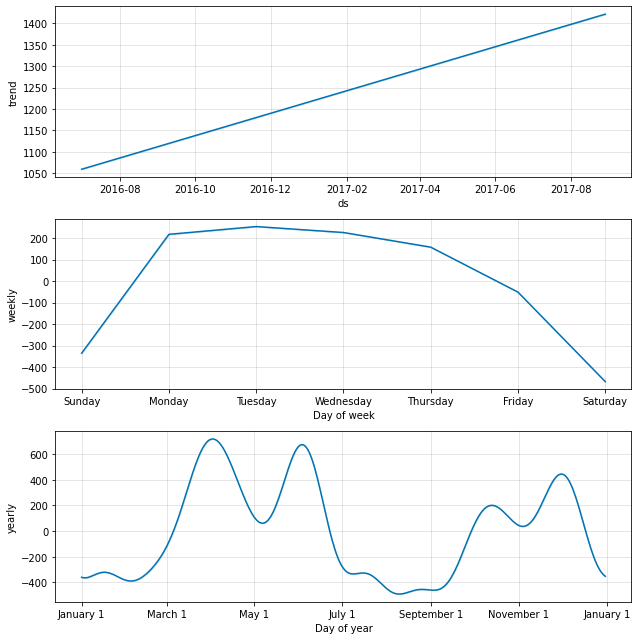

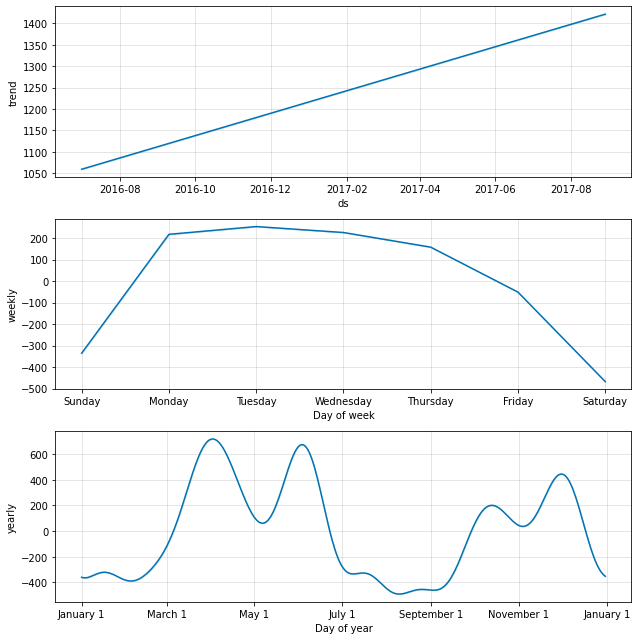

In [29]:
m.plot_components(forcsat)